In [1]:
import numpy as np
import sys
if "../src/" not in sys.path:
    sys.path.insert(0,"../src/")
from pbcpy.base import DirectCell, ReciprocalCell, Coord
from pbcpy.grid import DirectGrid, ReciprocalGrid
from pbcpy.field import DirectField,ReciprocalField
from pbcpy.base import s2r
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [35]:
at = np.identity(3)
at[0,0]=100
nr = [10001,1,1]
at

array([[ 100.,    0.,    0.],
       [   0.,    1.,    0.],
       [   0.,    0.,    1.]])

In [36]:
grid = DirectGrid(lattice=at, nr=nr)
reciprocal_grid = grid.get_reciprocal() 

In [37]:
reciprocal_grid.lattice

array([[ 0.06283185,  0.        ,  0.        ],
       [ 0.        ,  6.28318531,  0.        ],
       [ 0.        ,  0.        ,  6.28318531]])

In [38]:
#g = s2r(reciprocal_grid.g,reciprocal_grid)
g = reciprocal_grid.g
gg = reciprocal_grid.gg

In [39]:
reciprocal_grid.g

array([[[[ 0.        ,  0.        ,  0.        ]]],


       [[[ 0.06283185,  0.        ,  0.        ]]],


       [[[ 0.12566371,  0.        ,  0.        ]]],


       ..., 
       [[[-0.18849556,  0.        ,  0.        ]]],


       [[[-0.12566371,  0.        ,  0.        ]]],


       [[[-0.06283185,  0.        ,  0.        ]]]])

In [40]:
#dr = (grid.s - Coord([0.5,0,0],cell=grid,basis="S"))
dr = (grid.r - grid.r[5000,0,0])
dr2 = np.zeros(nr)
for i in range(nr[0]):
    dr2[i,0,0] = np.dot(dr[i,0,0],dr[i,0,0])


In [41]:
alpha = 0.7
gaussian = 1/(alpha*np.sqrt(2*np.pi))*np.exp(-dr2/(2*alpha*alpha))
dens = DirectField(grid=grid,griddata_3d=gaussian)

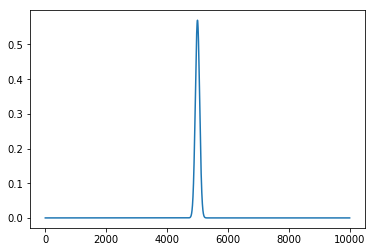

In [42]:
plt.plot(dens[:,0,0])

In [43]:
strf = np.exp(-(1j)*np.einsum('ijkl,l->ijk',g,grid.r[5000,0,0]))
strf = np.reshape(strf,[reciprocal_grid.nr[0],reciprocal_grid.nr[1],reciprocal_grid.nr[2],1])
print(np.shape(strf),np.shape(gg),np.shape(strf)[1])

(10001, 1, 1, 1) (10001, 1, 1, 1) 1


In [44]:
dens_rec = np.exp(-gg/(4*alpha*alpha))*strf

In [45]:
dens_rec_fft = dens.fft()

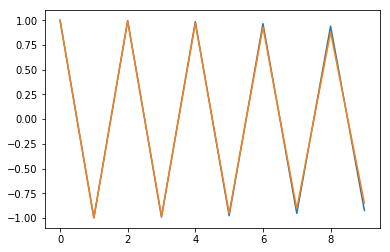

In [47]:
plt.plot(np.real(dens_rec_fft[0:10,0,0]))
#plt.plot(np.real(strf[0:10,0,0]))
plt.plot(np.real(dens_rec[0:10,0,0]))
plt.show()